<a href="https://colab.research.google.com/github/teliofm/codenation_ds/blob/master/main_codenation_challenge_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 2
# Codenation - Aceleradev - Data Science (Junho de 2020) - 2a semana

## Objetivo
Queremos conhecer melhor nossos clientes por estado. Para isso, iniciamos uma análise na pontuação de crédito. Para realizar a verificação inicial, precisamos de alguns valores. Os valores são a média, a mediana, a moda e o desvio padrão da pontuação de crédito.

## Tópicos
Neste desafio você aprenderá:

* Média;
* Mediana;
* Moda;
* Desvio padrão.

**Requisitos:** você precisará de python 3.6 (ou superior).

O recomendado é você utilizar um ambiente virtual. Para isto, execute os comandos como no exemplo abaixo:

*pip3 install virtualenv*

*virtualenv venv -p python3*

*source venv/bin/activate*

Ao terminar o desafio, você pode sair do ambiente criado com o comando deactivate

## Detalhes
A resposta deve conter os valores da média, mediana, moda e desvio padrão da pontuação de crédito para cada estado do dataset. O arquivo para submissão deve estar em formato json, conforme o arquivo exemplo “submission.json”.

**OBSERVAÇÃO:** É recomendado utilizar Python e pandas para esse desafio, mas também é possível utilizar outras ferramentas e linguagens de programação.

**Descrição dos dados:** ‘id’: Identificador do cliente ‘sobrenome’: Sobrenome do cliente ‘pontuacao_credito’: Pontuação de crédito do cliente (quanto maior, melhor o cliente geralmente) ‘estado_residencia’: Estado de residência do cliente ‘genero’: Gênero do cliente ‘nivel_estabilidade’: Nível de estabilidade do cliente ‘saldo_conta’: Saldo disponível na conta do cliente ‘numero_produtos’: Número de produtos que o cliente consome ‘possui_cartao_de_credito’: Possui um cartão de crédito cadastrado ‘membro_ativo’: Membro acessa e consome frequentemente

**Obs:** Os dados são fictícios, mas tentam representar a realidade de uma base de clientes de um produto SaaS.

#Início
**Objetivo:** extrair dados estatísticos da pontuação de crédito de clientes por estados da base de dados

Importando as bibliotecas (API)

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy import stats
import json

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Carregando base de dados

In [3]:
upload = files.upload()

Saving desafio1.csv to desafio1.csv


In [4]:
df = pd.read_csv("desafio1.csv")

Visualização rápida das primeiras linhas da base de dados

In [5]:
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


As 3 primeiras colunas são irrelevantes para qualquer avaliação subsequente

In [6]:
listaExcluir = df.columns[0:3]
listaExcluir

Index(['RowNumber', 'id', 'sobrenome'], dtype='object')

In [7]:
df.drop(columns=listaExcluir, inplace=True)

Nova visualização mais limpa

In [8]:
df.head()

,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,619,SC,F,42,2,0.00,1,1,1
1,608,RS,F,41,1,83807.86,1,0,1
2,502,SC,F,42,8,159660.80,3,1,0
3,699,SC,F,39,1,0.00,2,0,0
4,850,RS,F,43,2,125510.82,1,1,1


Quantidade de dados através do formato da base de dados

In [9]:
df.shape

(7000, 9)

Informação dos tipos de dados (já será possível checar se há valores nulos, comparando o total de não nulos ao formato da base de dados)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pontuacao_credito         7000 non-null   int64  
 1   estado_residencia         7000 non-null   object 
 2   genero                    7000 non-null   object 
 3   idade                     7000 non-null   int64  
 4   nivel_estabilidade        7000 non-null   int64  
 5   saldo_conta               7000 non-null   float64
 6   numero_produtos           7000 non-null   int64  
 7   possui_cartao_de_credito  7000 non-null   int64  
 8   membro_ativo              7000 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 492.3+ KB


Duas colunas do tipo *object* serão transformadas em *category* com fim na redução de memória utilizada.

In [11]:
df = df.astype({'estado_residencia':'category' ,'genero':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   pontuacao_credito         7000 non-null   int64   
 1   estado_residencia         7000 non-null   category
 2   genero                    7000 non-null   category
 3   idade                     7000 non-null   int64   
 4   nivel_estabilidade        7000 non-null   int64   
 5   saldo_conta               7000 non-null   float64 
 6   numero_produtos           7000 non-null   int64   
 7   possui_cartao_de_credito  7000 non-null   int64   
 8   membro_ativo              7000 non-null   int64   
dtypes: category(2), float64(1), int64(6)
memory usage: 396.8 KB


Verificação rápida e geral estatísticas das colunas com dados numéricos. (Os dados não estão classificados, estão totalizados)

In [12]:
df.describe()

,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


Confirmação da não existência de nulos na base de dados.

In [13]:
df.isna().sum()

pontuacao_credito           0
estado_residencia           0
genero                      0
idade                       0
nivel_estabilidade          0
saldo_conta                 0
numero_produtos             0
possui_cartao_de_credito    0
membro_ativo                0
dtype: int64

Checado e tratado a base de dados começaremos a visualizar a distribuição dos dados para por fim responder a questão objetivo.

In [14]:
df.head()

,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,619,SC,F,42,2,0.00,1,1,1
1,608,RS,F,41,1,83807.86,1,0,1
2,502,SC,F,42,8,159660.80,3,1,0
3,699,SC,F,39,1,0.00,2,0,0
4,850,RS,F,43,2,125510.82,1,1,1


## Análise Exploratória de Dados (extra)

Lista de todos os estados da base de dados.

In [15]:
df['estado_residencia'].value_counts().sort_index()

PR    1731
RS    1750
SC    3519
Name: estado_residencia, dtype: int64

Distribuição da quantidade de clientes pela coluna *nivel_estabilidade*.

In [16]:
df['nivel_estabilidade'].value_counts().sort_index()

0     294
1     720
2     721
3     724
4     683
5     718
6     664
7     726
8     725
9     700
10    325
Name: nivel_estabilidade, dtype: int64

Verificação da média da pontuação de crédito por estado.

In [17]:
df.groupby(['estado_residencia'])['pontuacao_credito'].mean()

estado_residencia
PR    648.961294
RS    651.105143
SC    649.537653
Name: pontuacao_credito, dtype: float64

Distribuição da quantidade de clientes por estado.

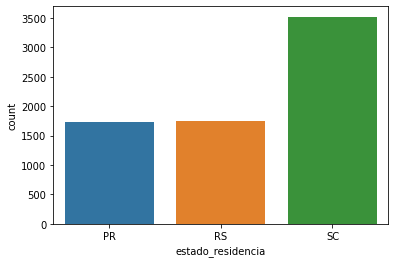

In [18]:
sns.countplot(x='estado_residencia', data=df)

Distribuição da idade dos clientes por estado.

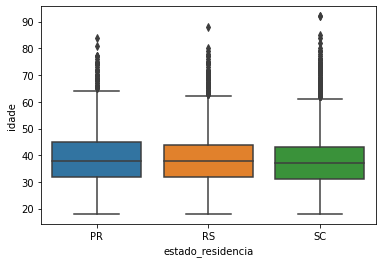

In [19]:
sns.boxplot(x='estado_residencia', y='idade', data=df)

Distribuição da pontuação de crédito dos clientes por estado.

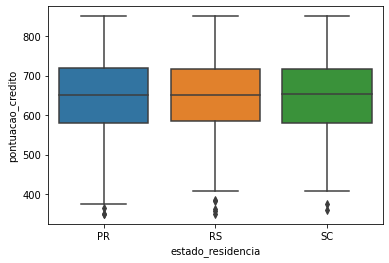

In [20]:
sns.boxplot(x='estado_residencia', y='pontuacao_credito', data=df)

Distribuição do saldo em conta dos clientes por estado.

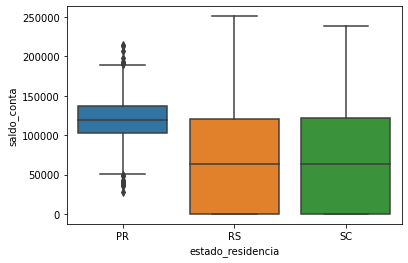

In [21]:
sns.boxplot(x='estado_residencia', y='saldo_conta', data=df)

# Questão Objetivo

Resolvido através de 3 maneiras distintas:

* Dictionary
* Pandas pivot_table
* Pandas group_by



## dictionary
A questão objetivo é obtida através da construção direta de um dicionário.

Lista com todos os estados

In [22]:
lista_estados = df['estado_residencia'].unique()

In [23]:
dict_estados = {}
for estado in lista_estados:
  df_estado = df[df['estado_residencia'] == estado]
  dict_estados[estado] = {
      'moda' : float(df_estado['pontuacao_credito'].mode()[0]),
      'mediana' : df_estado['pontuacao_credito'].median(),
      'media' : df_estado['pontuacao_credito'].mean(),
      'desvio_padrao' : df_estado['pontuacao_credito'].std()
  }
dict_estados

{'PR': {'desvio_padrao': 98.60718591309772,
  'media': 648.9612940496822,
  'mediana': 650.0,
  'moda': 850.0},
 'RS': {'desvio_padrao': 95.1365984138357,
  'media': 651.1051428571428,
  'mediana': 650.0,
  'moda': 850.0},
 'SC': {'desvio_padrao': 97.23349279343306,
  'media': 649.5376527422563,
  'mediana': 653.0,
  'moda': 850.0}}

In [24]:
json_dict_estados = json.dumps(dict_estados)
json_dict_estados

'{"SC": {"moda": 850.0, "mediana": 653.0, "media": 649.5376527422563, "desvio_padrao": 97.23349279343306}, "RS": {"moda": 850.0, "mediana": 650.0, "media": 651.1051428571428, "desvio_padrao": 95.1365984138357}, "PR": {"moda": 850.0, "mediana": 650.0, "media": 648.9612940496822, "desvio_padrao": 98.60718591309772}}'

In [26]:
with open('submission.json', 'w') as f:
  f.write(json_dict_estados)

## pivot_table

In [28]:
new_index = {'<lambda_0>':'moda', 'mean':'media', 'median':'mediana', 'std':'desvio_padrao'}
pt_dict_estados = pd.pivot_table(df, 
                values='pontuacao_credito', 
                columns=df['estado_residencia'],
                aggfunc={lambda x:x.value_counts().index[0], np.median, np.mean, np.std}
                )
pt_dict_estados = pt_dict_estados.rename(index=new_index)
pt_dict_estados

estado_residencia,PR,RS,SC
moda,850.000000,850.000000,850.000000
media,648.961294,651.105143,649.537653
mediana,650.000000,650.000000,653.000000
desvio_padrao,98.607186,95.136598,97.233493


In [29]:
#download = files.download(pt_dict_estados.to_json())
pt_dict_estados.to_json('submission.json')
pt_dict_estados.to_json()

'{"PR":{"moda":850.0,"media":648.9612940497,"mediana":650.0,"desvio_padrao":98.6071859131},"RS":{"moda":850.0,"media":651.1051428571,"mediana":650.0,"desvio_padrao":95.1365984138},"SC":{"moda":850.0,"media":649.5376527423,"mediana":653.0,"desvio_padrao":97.2334927934}}'

In [30]:
# Validação de outra maneira de calcular a moda a ser imputada no sub dataframe pd.Series contra a função lambda
new_index = {'<lambda_0>':'moda', 'mean':'media', 'median':'mediana', 'std':'desvio_padrao'}
pt_dict_estados = pd.pivot_table(df, 
                values='pontuacao_credito', 
                columns=df['estado_residencia'],
                aggfunc={pd.Series.mode, np.median, np.mean, np.std}
                )
pt_dict_estados = pt_dict_estados.rename(index=new_index)
pt_dict_estados

estado_residencia,PR,RS,SC
media,648.961294,651.105143,649.537653
mediana,650.000000,650.000000,653.000000
mode,850.000000,850.000000,850.000000
desvio_padrao,98.607186,95.136598,97.233493


## group_by

In [31]:
new_index = {'<lambda_0>':'moda', 'mean':'media', 'median':'mediana', 'std':'desvio_padrao'}
gb_dict_estados = df.groupby('estado_residencia')['pontuacao_credito'].agg(
    [lambda x:x.value_counts().index[0],'median', 'mean', 'std'])
gb_dict_estados = gb_dict_estados.T.rename(index=new_index)
gb_dict_estados

estado_residencia,PR,RS,SC
moda,850.000000,850.000000,850.000000
mediana,650.000000,650.000000,653.000000
media,648.961294,651.105143,649.537653
desvio_padrao,98.607186,95.136598,97.233493


In [32]:
pt_dict_estados.to_json('submission.json')
pt_dict_estados.to_json()

'{"PR":{"media":648.9612940497,"mediana":650.0,"mode":850.0,"desvio_padrao":98.6071859131},"RS":{"media":651.1051428571,"mediana":650.0,"mode":850.0,"desvio_padrao":95.1365984138},"SC":{"media":649.5376527423,"mediana":653.0,"mode":850.0,"desvio_padrao":97.2334927934}}'

## Download Answer

In [33]:
!ls

desafio1.csv  sample_data  submission.json


In [ ]:
files.download('submission.json')